In [4]:
#tensorflow 2.0 불러오기 

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import folium
import pandas as pd
import json
import urllib.request
import datetime
import time
import webbrowser


In [18]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
  

Saving 다음소프트_키워드 버즈추이.csv to 다음소프트_키워드 버즈추이 (1).csv
Saving 망고플레이트_가맹점 정보.xlsx to 망고플레이트_가맹점 정보 (1).xlsx
Saving 망고플레이트_사용자 밀집도.xlsx to 망고플레이트_사용자 밀집도 (1).xlsx
Saving 비씨카드.csv to 비씨카드 (1).csv
User uploaded file "다음소프트_키워드 버즈추이.csv" with length 368026 bytes
User uploaded file "망고플레이트_가맹점 정보.xlsx" with length 417646 bytes
User uploaded file "망고플레이트_사용자 밀집도.xlsx" with length 21213423 bytes
User uploaded file "비씨카드.csv" with length 1084860 bytes


In [0]:
people = pd.read_excel("KT_유동인구.xlsx")


In [0]:
store = pd.read_excel("망고플레이트_가맹점 정보.xlsx")
mango_user = pd.read_excel("망고플레이트_사용자 밀집도.xlsx")
card = pd.read_csv("비씨카드.csv",encoding="euc-kr")
keyword = pd.read_csv("다음소프트_키워드 버즈추이.csv",encoding="euc-kr")

In [0]:
df = [store,people,mango_user,card,keyword]

In [25]:
#데이터의 null값 갯수 찾기
for i in df:
  print(i.isnull().sum())
  print(i.count())
  print("------------------------------------")

restaurant_name              0
restaurant_branch_name    2092
address                      0
latitude                     0
longitude                    0
price_range_code             0
parking_option_code          0
business_hour              567
day_off                   2182
menu_text                   91
rating                    2256
review_count                 0
dtype: int64
restaurant_name           3000
restaurant_branch_name     908
address                   3000
latitude                  3000
longitude                 3000
price_range_code          3000
parking_option_code       3000
business_hour             2433
day_off                    818
menu_text                 2909
rating                     744
review_count              3000
dtype: int64
------------------------------------
Unnamed: 0    35
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3    33
dtype: int64
Unnamed: 0     0
Unnamed: 1    35
Unnamed: 2    35
Unnamed: 3     2
dtype: int64
-------------------------------

In [26]:
for i in df:
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
restaurant_name           3000 non-null object
restaurant_branch_name    908 non-null object
address                   3000 non-null object
latitude                  3000 non-null float64
longitude                 3000 non-null float64
price_range_code          3000 non-null int64
parking_option_code       3000 non-null int64
business_hour             2433 non-null object
day_off                   818 non-null object
menu_text                 2909 non-null object
rating                    744 non-null float64
review_count              3000 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 281.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
Unnamed: 0    0 non-null float64
Unnamed: 1    35 non-null object
Unnamed: 2    35 non-null object
Unnamed: 3    2 non-null object
dtypes: float64(1), object(3)
memor

In [0]:
#store 위치 표시하기 
map_osm = folium.Map(location=[37.566345, 126.977893],zoom_start = 10)
for i,j in zip(store.latitude[:10], store.longitude[:10]) :
  folium.CircleMarker([i,j], radius=5,color='#3186cc',fill_color='#3186cc', popup="k").add_to(map_osm)

In [28]:
map_osm

In [29]:
# 시각화 하기
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

#한글깨짐
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="malgun.ttf").get_name()
rc('font', family=font_name)

    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

FileNotFoundError: ignored

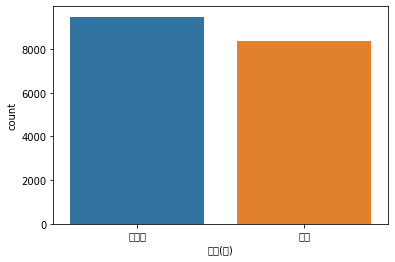

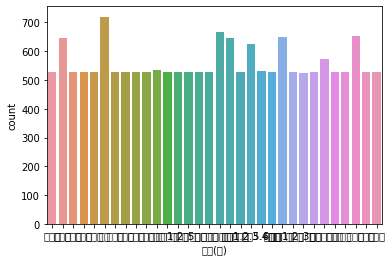

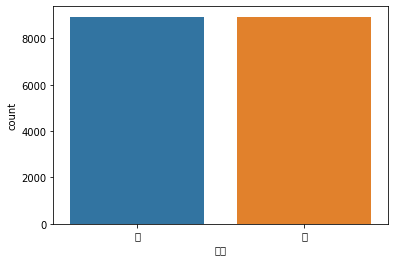

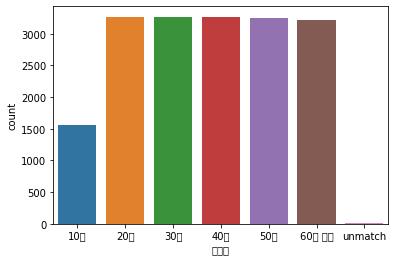

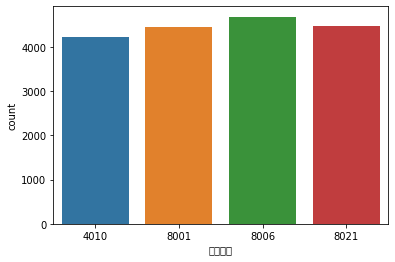

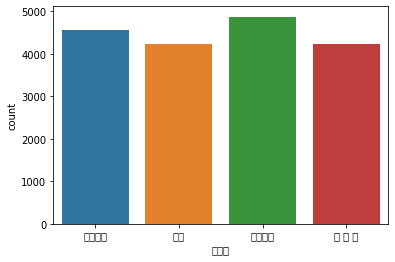

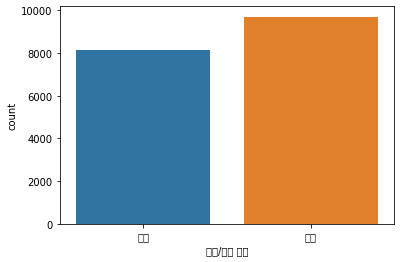

In [30]:
x= 0 
for i in card.columns[1:8] :
  plt.figure(x)
  x= x + 1
  sns.countplot(card[i].sort_values())

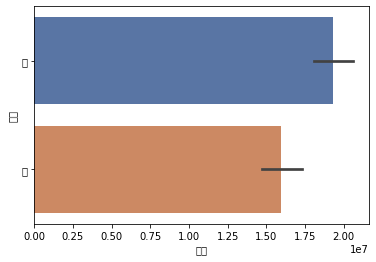

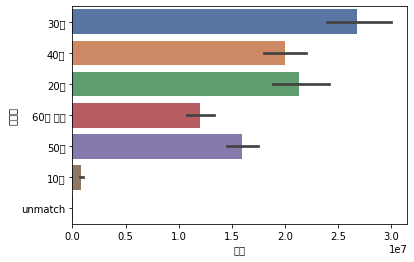

In [0]:
x= 0
for i in card.columns[3:5]:
  plt.figure(x)
  x= x + 1
  sns.barplot( y = card[i], x = card["금액"] , palette = "deep")


In [33]:
for i in df:
  print(i.columns)

Index(['restaurant_name', 'restaurant_branch_name', 'address', 'latitude',
       'longitude', 'price_range_code', 'parking_option_code', 'business_hour',
       'day_off', 'menu_text', 'rating', 'review_count'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')
Index(['activity_date', 'activity_hour', 'lat', 'long', 'activity_count'], dtype='object')
Index(['매출년월', '지역(구)', '지역(동)', '성별', '연령대', '업종코드', '업종명', '신용/체크 구분', '건수',
       '금액'],
      dtype='object')
Index(['키워드', '일자', '빈도수', '채널'], dtype='object')


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


# recurrent neural networks with *keras*

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
#build a simple model
#there are 3 bulit_in RNN layers in keras
#1. tf.keras.layers.simpleRNN , a fully connected RNN where the output from previous timestep is to be fed to next timestep.
#2. tf.keras.layers.GPU, first proposed in learning pharase representations using RNN encoder-decoder for statistical machine translation
#3. tf.keras.layers.LSTN , first proposed in long short-term memory

In [15]:
model  = tf.keras.Sequential()

#add an enbedding layer expecting input vocab of size 1000, 
#and output embedding dimension of size 64
model.add(layers.Embedding(input_dim = 1000, output_dim = 64))

#add a lstm layer with 128 internal units
model.add(layers.LSTM(128))

#add a dense layer with 10 units and softmax activation.
model.add(layers.Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim = 1000, output_dim = 64))

#output of GRU will be 3d tensor of shape( batch_sizez, timesteps, 256)
model.add(layers.GRU(256, return_sequences = True))

#the output of simpleRNN will be 2d tensor of shape(batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10, activation = "softmax"))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________
